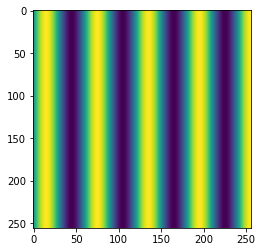

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(256)
y = np.sin(2 * np.pi * x / 60)

y += max(y)

# generate a 256x256 image
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8)
plt.imshow(img)

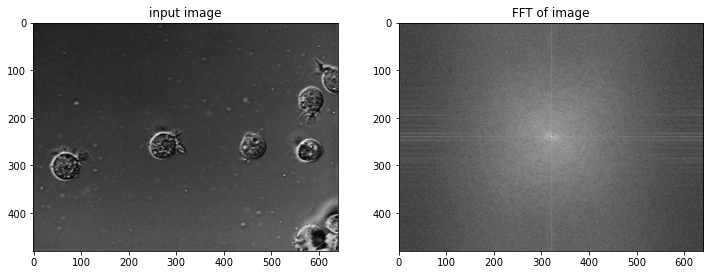

In [13]:
img = cv2.imread('../sample/1.tiff', 0)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])))

plt.figure(figsize=(12,8))

plt.subplot(121) 
plt.title('input image')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('FFT of image')
plt.imshow(magnitude_spectrum, cmap='gray')

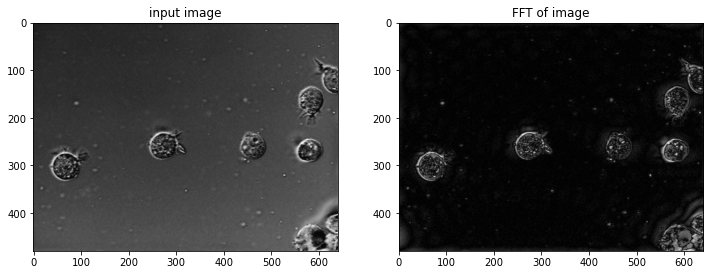

In [22]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

fshift = dft_shift * mask

fshift_mask_mag = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)

img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(12,8))

plt.subplot(121) 
plt.title('input image')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('FFT of image')
plt.imshow(img_back, cmap='gray')